In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"D:/MLAI/dataset/Brain Stroke.csv")

In [3]:
data.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [4]:
data.shape

(4981, 11)

In [5]:
data.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [6]:
#Data is not balance

In [7]:
x=data.iloc[:,[1,2,3,7,8]]
y=data.iloc[:,-1]

In [8]:
feature_cols=['age','hypertension','heart_disease','bmi','smoking_status']

In [9]:
# Data balance by using RandomOver sampling technique

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
r=RandomOverSampler()
x_resample,y_resample=r.fit_resample(x,y)
print(Counter(y_resample))

Counter({1: 4733, 0: 4733})


# split data into train and test


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=100)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
l=LogisticRegression()
k=KNeighborsClassifier()
s=SVC()
r= RandomForestClassifier()

In [13]:
print(l.fit(x_train,y_train))
print(k.fit(x_train,y_train))
print(s.fit(x_train,y_train))
print(r.fit(x_train,y_train))

LogisticRegression()
KNeighborsClassifier()
SVC()
RandomForestClassifier()


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
for clf in (l,k,s,r):
    y_pred = clf.predict(x_test)
    print(
        clf.__class__.__name__,
        '\n',
        'Accuracy score: ',accuracy_score(y_test, y_pred)*100, '\n',
        'Precision score: ',precision_score(y_test, y_pred, zero_division = 1), '\n',
        'Recall score: ',recall_score(y_test, y_pred, zero_division = 1), '\n',
        'F1 score: ',f1_score(y_test, y_pred, zero_division = 1), '\n',
        'ROC AUC score: ',roc_auc_score(y_test, y_pred), '\n', 

    )

LogisticRegression 
 Accuracy score:  77.40232312565998 
 Precision score:  0.7541142303969022 
 Recall score:  0.8174186778593914 
 F1 score:  0.7844914400805638 
 ROC AUC score:  0.7737465334036595 

KNeighborsClassifier 
 Accuracy score:  92.60823653643084 
 Precision score:  0.8719121683440073 
 Recall score:  1.0 
 F1 score:  0.9315738025415445 
 ROC AUC score:  0.9256110520722636 

SVC 
 Accuracy score:  74.7624076029567 
 Precision score:  0.7290260366441659 
 Recall score:  0.7932843651626443 
 F1 score:  0.7597989949748745 
 ROC AUC score:  0.747332937097794 

RandomForestClassifier 
 Accuracy score:  98.41605068637803 
 Precision score:  0.9694811800610377 
 Recall score:  1.0 
 F1 score:  0.984504132231405 
 ROC AUC score:  0.9840595111583421 



In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
# Create Decision Tree classifer object
dt= DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=100)
# Train Decision Tree Classifer
dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [16]:
#predict the response for test dataset
y_pred=dt.predict(x_test)

#model Accuracy,how often is the classifier correct
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.791974656810982


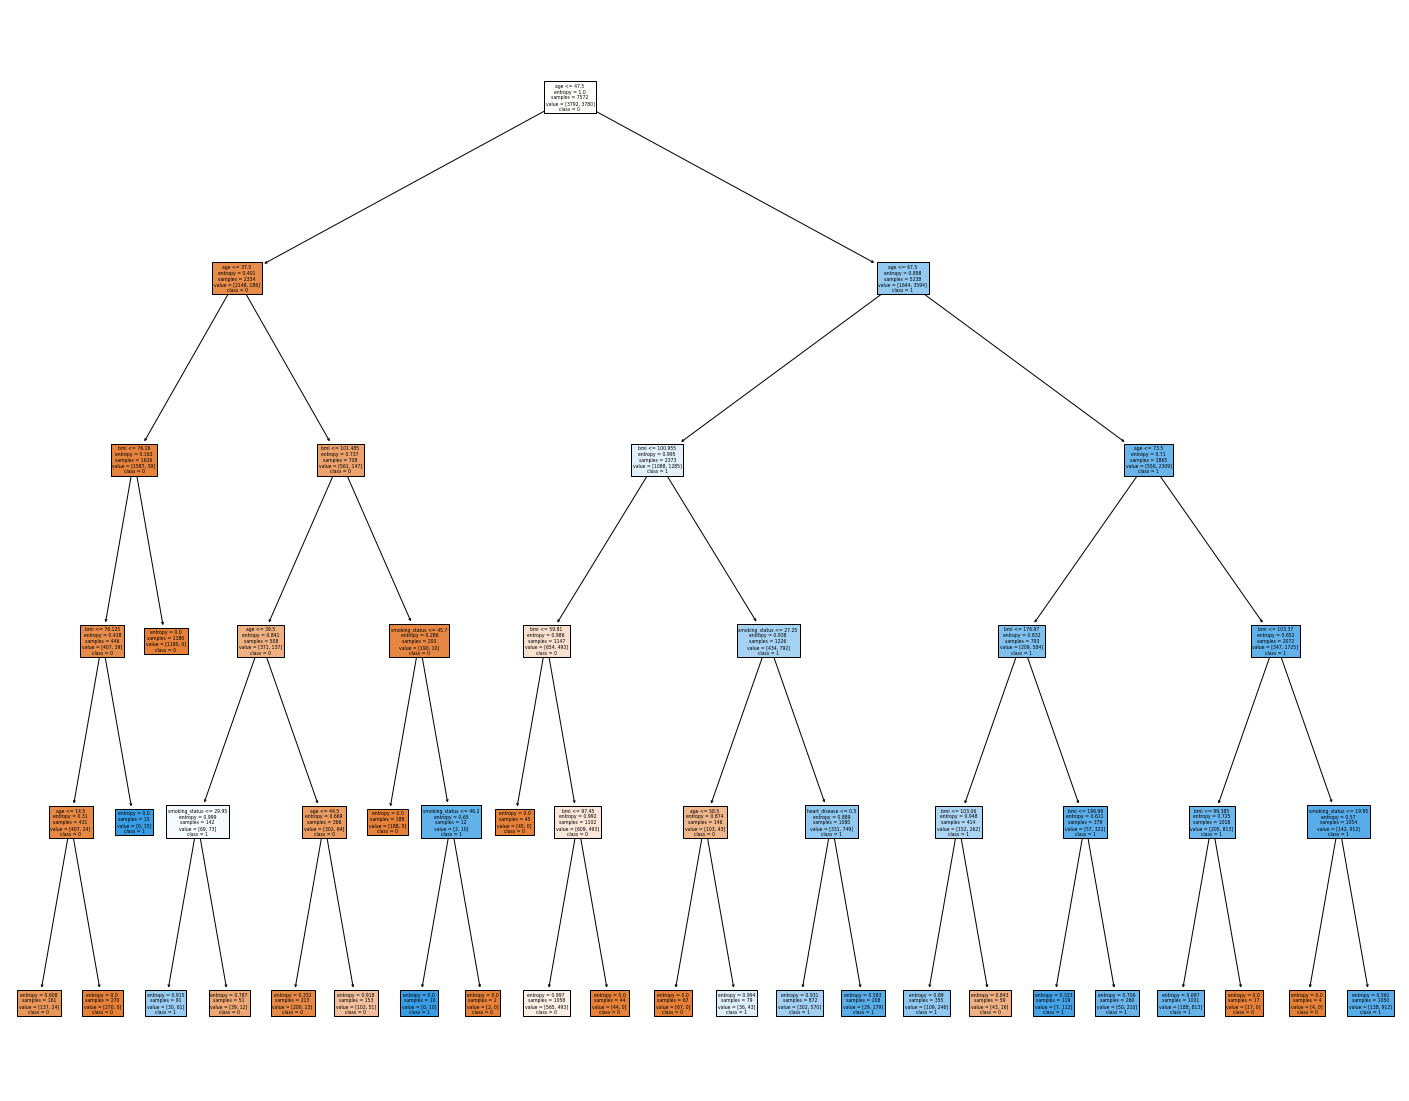

In [17]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

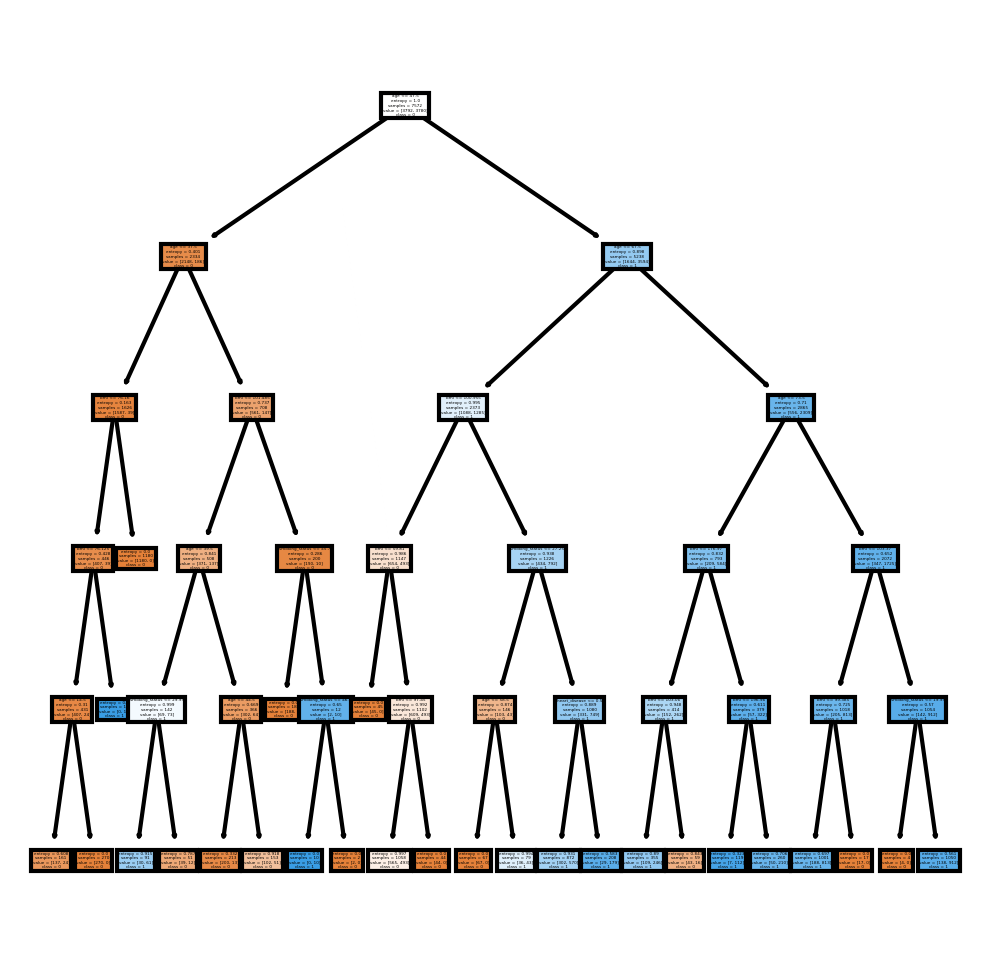

In [18]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt,
           feature_names = feature_cols , 
           class_names=['0','1'],
           filled = True);

In [19]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 47.50
|   |--- feature_0 <= 37.50
|   |   |--- feature_3 <= 76.16
|   |   |   |--- feature_3 <= 76.12
|   |   |   |   |--- feature_0 <= 14.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  14.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  76.12
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  76.16
|   |   |   |--- class: 0
|   |--- feature_0 >  37.50
|   |   |--- feature_3 <= 101.48
|   |   |   |--- feature_0 <= 39.50
|   |   |   |   |--- feature_4 <= 29.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  29.95
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  39.50
|   |   |   |   |--- feature_0 <= 44.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  44.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  101.48
|   |   |   |--- feature_4 <= 45.70
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  45.70
|   |   |   |   |--- feature_4 <= 46.20
|   